In [2]:
import Circuit as circuit
import plotter as plter
import numpy as np

### Inverting Amplifier

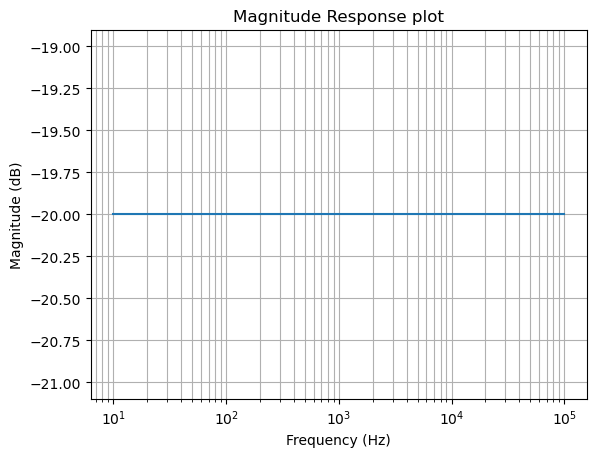

In [3]:
circ = circuit.Circuit()                
Vin  = circuit.VoltageSource(1.0)
op   = circuit.IdealOpAmp()
R1   = circuit.Resistor(100e3)
R2   = circuit.Resistor(10e3)

for c in (Vin, op, R1, R2):
    circ.addComponent(c)

circ.connectComponents(Vin,'p',  R1,'n')      
circ.connectComponents(Vin,'n',  None,None)   
circ.connectComponents(R1,'p',   R2,'n')      
circ.connectComponents(R1,'p',   op,'V-')    
circ.connectComponents(op,'V+',  None,None)   
circ.connectComponents(op,'Vout',R2,'p')      

f = np.logspace(1, 5, 400)           
mag = np.zeros_like(f, dtype=float)
phase = np.zeros_like(f, dtype=float)

for i, freq in enumerate(f):
    omega = 2 * np.pi * freq
    circ.setFrequency(omega)
    V = circ.solveSystem()
    Vout = V[op.Vout]
    mag[i] = 20 * np.log10(np.abs(Vout))
    phase[i] = np.angle(Vout, deg=True)



circuitPlotter = plter.Plotter(f, mag, phase)
circuitPlotter.plotMagnitude()


### Non inverting amplifier 

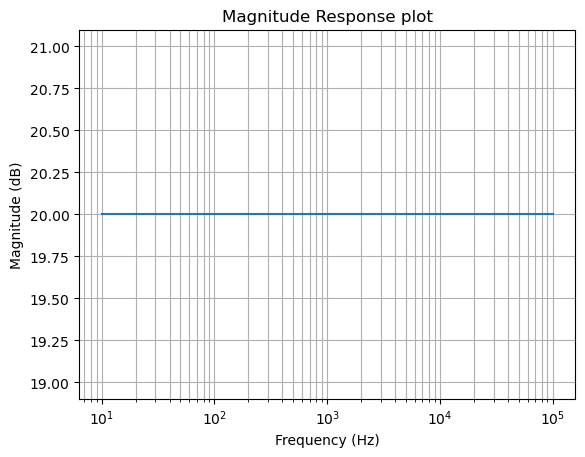

In [4]:
circ = circuit.Circuit()                
Vin  = circuit.VoltageSource(1.0)
op   = circuit.IdealOpAmp()
R1   = circuit.Resistor(10e3)
R2   = circuit.Resistor(90e3)

for c in (Vin, op, R1, R2):
    circ.addComponent(c)

circ.connectComponents(Vin,'p',  op,'V+')      
circ.connectComponents(R1, 'n', None, None)
circ.connectComponents(R1, 'p', R2, 'n')
circ.connectComponents(R1, 'p', op, 'V-')
circ.connectComponents(R2, 'p', op,'Vout')
circ.connectComponents(Vin,'n', None, None)


f = np.logspace(1, 5, 400)           
mag = np.zeros_like(f, dtype=float)
phase = np.zeros_like(f, dtype=float)

for i, freq in enumerate(f):
    omega = 2 * np.pi * freq
    circ.setFrequency(omega)
    V = circ.solveSystem()
    Vout = V[op.Vout]
    mag[i] = 20 * np.log10(np.abs(Vout))
    phase[i] = np.angle(Vout, deg=True)



circuitPlotter = plter.Plotter(f, mag, phase)
circuitPlotter.plotMagnitude()

### sallen key band pass

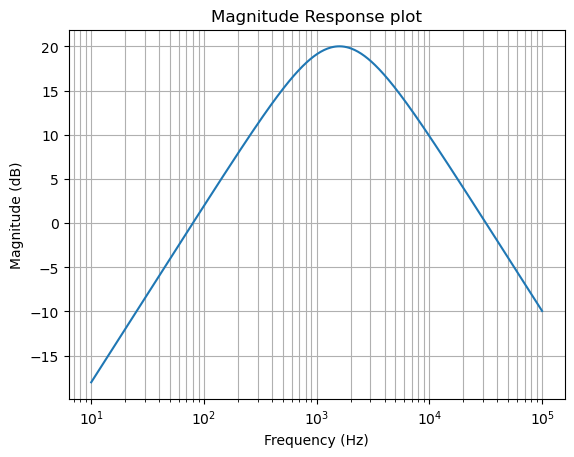

In [ ]:

circ = circuit.Circuit()
Vin = circuit.VoltageSource(1.0)            
circ.addComponent(Vin)
circ.connectComponents(Vin, 'n',  None, None)  

opHP  = circuit.IdealOpAmp()
C1_HP = circuit.Capacitor(10e-9)         
C2_HP = circuit.Capacitor(10e-9)
R1_HP = circuit.Resistor (10e3)            
R2_HP = circuit.Resistor (200e3)

for c in (opHP, C1_HP, C2_HP, R1_HP, R2_HP):
    circ.addComponent(c)


circ.connectComponents(Vin,   'p', C1_HP, 'p')      
circ.connectComponents(C1_HP, 'n', opHP,  'V+')     
circ.connectComponents(C1_HP, 'n', R1_HP,'p')      
circ.connectComponents(R1_HP, 'n', None,  None)
circ.connectComponents(opHP,  'Vout', C2_HP,'n')   
circ.connectComponents(C2_HP, 'p', C1_HP,'n')       
circ.connectComponents(opHP,  'Vout', opHP,'V-')   

opLP  = circuit.IdealOpAmp()
R1_LP = circuit.Resistor (10e3)
R2_LP = circuit.Resistor (10e3)
C1_LP = circuit.Capacitor(10e-9)
C2_LP = circuit.Capacitor(10e-9)

for c in (opLP, R1_LP, R2_LP, C1_LP, C2_LP):
    circ.addComponent(c)

circ.connectComponents(opHP,'Vout', R1_LP,'p')     
circ.connectComponents(R1_LP,'n',   opLP,'V+')     
circ.connectComponents(R1_LP,'n',   C1_LP,'p')    
circ.connectComponents(C1_LP,'n',   None,  None)

circ.connectComponents(opLP,'Vout', R2_LP,'p')     
circ.connectComponents(R2_LP,'n',   R1_LP,'n')     
circ.connectComponents(opLP,'Vout', C2_LP,'n')     
circ.connectComponents(C2_LP,'p',   None,  None)
circ.connectComponents(opLP,'Vout', opLP,'V-')     


opG   = circuit.IdealOpAmp()
RinG  = circuit.Resistor(10e3)   
RfG   = circuit.Resistor(190e3)   

for c in (opG, RinG, RfG):
    circ.addComponent(c)


circ.connectComponents(opLP, 'Vout', opG,  'V+')


circ.connectComponents(opG,  'Vout', RfG, 'p')
circ.connectComponents(RfG,  'n',    opG, 'V-')
circ.connectComponents(opG,  'V-',   RinG,'p')
circ.connectComponents(RinG, 'n',    None, None)   

VOUT_NODE = opG.Vout      


f     = np.logspace(1, 5, 400)          
mag   = np.zeros_like(f)
phase = np.zeros_like(f)

for i, freq in enumerate(f):
    circ.setFrequency(2*np.pi*freq)
    V = circ.solveSystem()
    Vout = V[VOUT_NODE]
    mag[i]   = 20*np.log10(abs(Vout))
    phase[i] = np.angle(Vout, deg=True)

plter.Plotter(f, mag, phase).plotMagnitude()